# **<font size=5 color = black>Attenuation Coefficient Simulation-Multiple Layer</font>**

  Hang Yang

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**<font color = black>Parameter Initialization</font>**

In [2]:
import numpy as np
import math as math


alpha = 0.5   # a fixed fraction of the attenuated light back scattered
beta = 2      # a conversion factor depending on the  camera
L0 = 1        # the irradiance of the incident light beam
thickness = 2  # simulated tissue thickness
axialres = 0.004  # axial resolution
tissueposition = 0.2  # tissue is placed at 0.2mm from zero-delay line

phantomthick = 0.36 # each layer is 0.36 thick

depth = np.arange(0, thickness, axialres)
tissue = np.arange(0, thickness, axialres)

%whos


Variable         Type       Data/Info
-------------------------------------
L0               int        1
alpha            float      0.5
axialres         float      0.004
beta             int        2
depth            ndarray    500: 500 elems, type `float64`, 4000 bytes
math             module     <module 'math' (built-in)>
np               module     <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
phantomthick     float      0.36
thickness        int        2
tissue           ndarray    500: 500 elems, type `float64`, 4000 bytes
tissueposition   float      0.2


  **<font color = black>Construct multiple atteunation layer</font>**
  

In [10]:
mu0 = [0.5,1,2,5,10] # 5 layers with different attenuation 

mu = np.zeros(len(mu0)*int(phantomthick/axialres)) 

tmp = 0

for i in mu0:
    mu[tmp:tmp+int(phantomthick/axialres)] = i
    tmp = tmp + int(phantomthick/axialres)
    


**<font color = black>Light Attenuation simulation to get depth profile</font>**

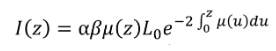

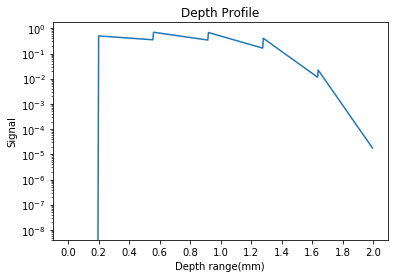

In [20]:
Iz = np.zeros(np.size(tissue))
Iz[int(tissueposition/axialres)-1] = 1e-8

j = 0
for i in mu:
    Iz[int(tissueposition/axialres)+j] = alpha*beta*i*L0*np.exp(-2*axialres*sum(mu[0:j]))
    j = j+1


import matplotlib.pyplot as plt
import pylab



plt.plot(depth, Iz[0:(np.size(depth))])
plt.yscale('log')

plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Signal")
plt.title("Depth Profile")

plt.show()

**<font color = black>Based on depth profile Calculate attenuation coefficient</font>**


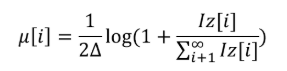

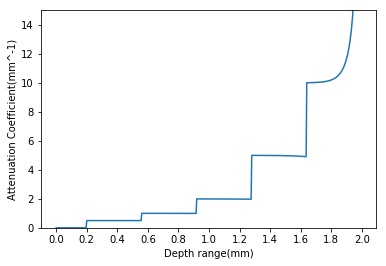

In [23]:
CalMu = np.zeros(np.size(tissue))
j = 0

for i in Iz:
    CalMu[j] = 1/(2*axialres)*math.log(1+i/sum(Iz[j+1:len(Iz)]))
    j = j+1
    

plt.plot(depth, CalMu[0:(np.size(depth))])


plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Attenuation Coefficient(mm^-1)")
plt.ylim(0,15)

plt.show()


But the error also increased towards the end of the imaging range. It was the same reason above.

**<font color = black>Attenuation coeffcient correction</font>**

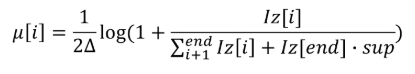

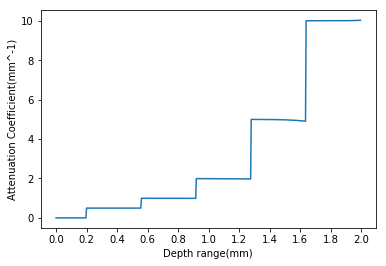

In [32]:
thresh = 31600

sup = (thresh*axialres-sum(mu[0:len(mu)])*axialres)/mu[len(mu)-1]

CalMu = np.zeros(np.size(tissue))
j = 0

for i in tissue:
        CalMu[j] = 1/(2*axialres)*math.log(1+Iz[j]/(sum(Iz[j+1:len(Iz)])+Iz[len(Iz)-1]*sup))
        j=j+1
    
                        
plt.plot(depth, CalMu[0:(np.size(depth))])


plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Attenuation Coefficient(mm^-1)")


plt.show()

